<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p5_FunctionalAPI_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Some neural network may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer

In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import regularizers
import os
import math

In [2]:
np.random.seed(21)
tf.random.set_seed(21)

In [3]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [4]:
X_train.shape

(404, 13)

In [5]:
import pandas as pd
df=pd.DataFrame(X_train)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11


In [6]:
input_A = keras.layers.Input(shape=[5], name="deep_input") #5 features frrom 0 to 4
input_B = keras.layers.Input(shape=[6], name="wide_input") #6 features from 2 to 7
 
#shape: A shape tuple (integers), not including the batch size. 
#For instance, shape=(32,) indicates that the expected input will be batches of 32-dimensional vectors.

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

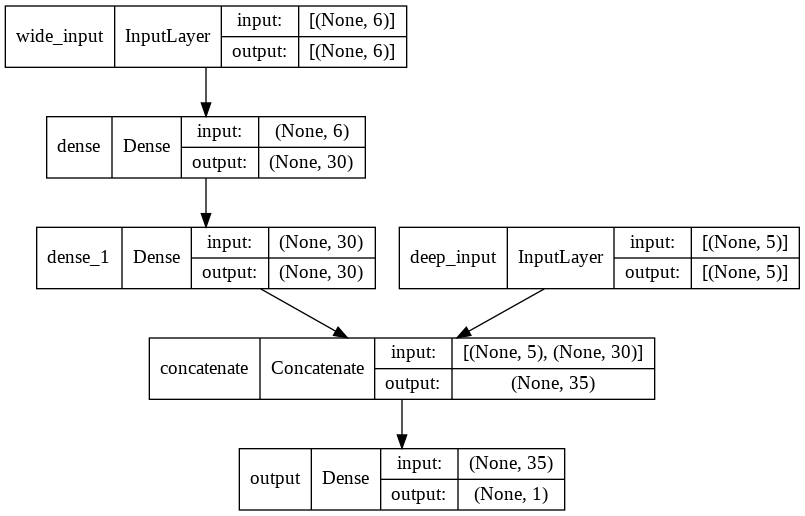

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:8] #input_a, input_b


X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:8]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_split=0.2)

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
11/11 [==============================] - 1s 22ms/step - loss: 2494.8418 - val_loss: 223.3591
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 170.5213 - val_loss: 251.0226
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 166.5493 - val_loss: 190.1649
Epoch 4/20
11/11 [==============================] - 0s 5ms/step - loss: 157.4810 - val_loss: 329.8920
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 173.3771 - val_loss: 195.6797
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 167.4260 - val_loss: 546.1800
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 218.5023 - val_loss: 903.0474
Epoch 8/20
11/11 [==============================] - 0s 5ms/step - loss: 200.1925 - val_loss: 380.0945
Epoch 9/20
11/11 [==============================] - 0s 4ms/step - loss: 159.0135 - val_loss: 129.6644
Epoch 10/20
11/11 [==============================] - 0s 7ms/step - loss: 134.702

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 wide_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['wide_input[0][0]']             
                                                                                                  
 deep_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

Adding an auxiliary output for regularization:

In [10]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [11]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [12]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 1s 25ms/step - loss: nan - main_output_loss: nan - aux_output_loss: nan - val_loss: nan - val_main_output_loss: nan - val_aux_output_loss: nan
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: nan - main_output_loss: nan - aux_output_loss: nan - val_loss: nan - val_main_output_loss: nan - val_aux_output_loss: nan
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: nan - main_output_loss: nan - aux_output_loss: nan - val_loss: nan - val_main_output_loss: nan - val_aux_output_loss: nan
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: nan - main_output_loss: nan - aux_output_loss: nan - val_loss: nan - val_main_output_loss: nan - val_aux_output_loss: nan
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: nan - main_output_loss: nan - aux_output_loss: nan - val_loss: nan - val_main_output_loss: nan - val_aux_output_loss: nan
Epoch 6/20
11/11 [===========

In [13]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

4/4 [==============================] - 0s 4ms/step - loss: nan - main_output_loss: nan - aux_output_loss: nan


Layer that concatenates a list of inputs.

It takes as input a list of tensors, all of the same shape except for the concatenation axis, and returns a single tensor that is the concatenation of all inputs.